In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga desde un archivo .csv sin indice
df = pd.read_csv('Mexico_HotelRoom.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            125 non-null    int64  
 1   last_scraped                                  125 non-null    object 
 2   name                                          125 non-null    object 
 3   host_id                                       125 non-null    int64  
 4   host_name                                     125 non-null    object 
 5   host_since                                    125 non-null    object 
 6   host_response_time                            125 non-null    object 
 7   host_is_superhost                             125 non-null    object 
 8   host_identity_verified                        125 non-null    object 
 9   neighbourhood                                 125 non-null    obj

<Axes: xlabel='bathrooms', ylabel='accommodates'>

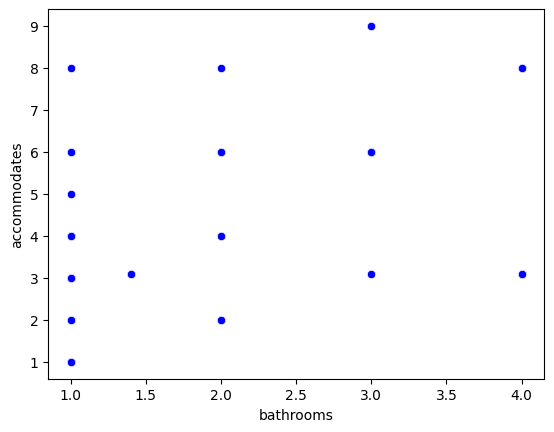

In [3]:
# Imprimimos el scatter plot entre la variable dependiente (accommodates) e independiente (bathrooms) 
# para observar el comportamiento en su dipersión
from turtle import color

sns.scatterplot(x='bathrooms', y = 'accommodates', color="blue", data = df)

In [4]:
# Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df ['accommodates']

In [5]:
# Se define model como la función de regresión lineal 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Verificamos la función relacioanada al modelo 
type(model)

sklearn.linear_model._base.LinearRegression

In [6]:
# Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [7]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.21955491]),
 'rank_': 1,
 'singular_': array([9.91073761]),
 'intercept_': 1.5189613156711608}

**Modelo matematico**

In [8]:
# Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R 
model.score(Vars_Indep, Var_Dep)

0.3348339285143773

In [9]:
# Predeciumos los valores del precio del tipo de cuarto a partir de la variable "bathrooms" 
y_pred = model.predict( X = df [['bathrooms']])
y_pred

array([2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 3.22633818,
       2.73851622, 3.95807113, 3.22633818, 3.22633818, 2.73851622,
       2.73851622, 2.73851622, 3.22633818, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 3.95807113,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 3.95807113,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851622,
       2.73851622, 2.73851622, 2.73851622, 2.73851622, 2.73851

In [10]:
# Insertanos la columnna de predicciones en el dataframe
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,id,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2.738516,281134,2024-09-26,COOL PENT HOUSE APARTMENT @CONDESA,196253,Fernando,2010-08-09,within an hour,t,t,...,4.71,5.00,5.00,5.00,5.00,4.86,8.0,4.0,1.0,0.0
1,2.738516,1565220,2024-09-26,Descansa en la Suite de la Abuelita San Angel ...,2518152,Martha Laura,2012-06-01,within an hour,t,t,...,5.00,5.00,5.00,4.96,4.93,4.93,7.0,1.0,4.0,0.0
2,2.738516,1736063,2024-09-26,"Cómodo Estudio del Botánico, San Angel CDMX",2518152,Martha Laura,2012-06-01,within an hour,t,t,...,4.84,4.97,4.89,4.93,4.96,4.86,7.0,1.0,4.0,0.0
3,2.738516,571166,2024-09-26,MODERN/HIP FURNISHED APARTMENT ( S1 Condesa Haus),196253,Fernando,2010-08-09,within an hour,t,t,...,5.00,5.00,5.00,4.90,5.00,4.00,8.0,4.0,1.0,0.0
4,2.738516,737328,2024-09-26,Business Suite BEIGE near Reforma,3850198,Hermann,2012-10-12,within an hour,f,t,...,4.88,4.84,5.00,5.00,4.84,4.80,11.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,6.397181,1191430079828817253,2024-09-26,4 Modern Units Just Steps from the Downtown!,547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0
121,6.397181,1191430130484570539,2024-09-26,"4 Units with City View, Steps from Alameda Cen...",547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0
122,6.397181,1191430238014754309,2024-09-26,Rooftop Deck with Majestic Views! 4 Units,547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0
123,2.738516,1191430521084135024,2024-09-26,"Near Alameda Central, Bike Tours, Museum Treats",547380140,Aishat,2023-11-20,within an hour,f,f,...,4.88,4.86,4.92,4.93,4.93,4.81,22.0,0.0,0.0,0.0


<Axes: xlabel='bathrooms', ylabel='accommodates'>

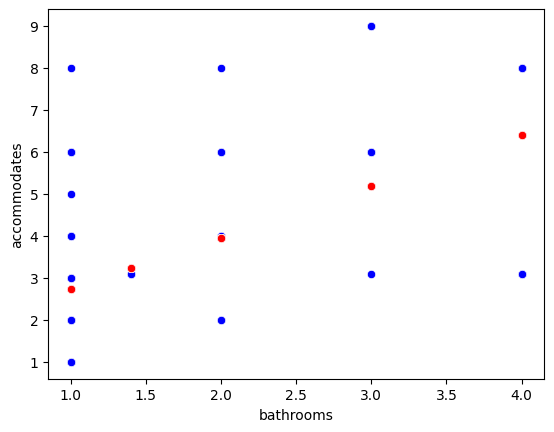

In [11]:
# Visualizamos la gráfica comparartiva entre el nuemro de huespedes real y el numero de huespedes predecido 

sns.scatterplot(x = 'bathrooms', y = 'accommodates', color = "blue", data = df)
sns.scatterplot(x = 'bathrooms', y = 'Predicciones', color = "red", data = df)

In [12]:
# Corroboramos cual es el coeficiente de determianción de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.3348339285143773

In [13]:
# Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.5786483634422354

In [14]:
# Filtrar y eliminar columnas de tipo objeto
df = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Predicciones                                  125 non-null    float64
 1   id                                            125 non-null    int64  
 2   host_id                                       125 non-null    int64  
 3   latitude                                      125 non-null    float64
 4   longitude                                     125 non-null    float64
 5   host_response_rate                            125 non-null    float64
 6   host_acceptance_rate                          125 non-null    float64
 7   host_listings_count                           125 non-null    float64
 8   host_total_listings_count                     125 non-null    float64
 9   accommodates                                  125 non-null    flo

In [16]:
# Encontramos todas las correlaciones entre las variables 
Corr_Factors = df.corr()

# Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1 = abs(Corr_Factors)

Corr_Factors1

,Predicciones,id,host_id,latitude,longitude,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
Predicciones,1.000000,0.623002,0.546893,0.188490,0.285220,0.066154,0.033969,0.236962,0.195439,0.578648,...,0.122780,0.041513,0.129094,0.123727,0.059344,0.069279,0.319963,0.170399,0.197529,0.050867
id,0.623002,1.000000,0.888486,0.221483,0.416327,0.243323,0.046231,0.271378,0.226916,0.464981,...,0.176382,0.058559,0.171775,0.191352,0.093680,0.133920,0.389898,0.255748,0.388772,0.119164
host_id,0.546893,0.888486,1.000000,0.301864,0.369230,0.221298,0.204208,0.135410,0.113987,0.385822,...,0.009294,0.072532,0.000663,0.057596,0.008775,0.008296,0.267947,0.314866,0.468991,0.100308
latitude,0.188490,0.221483,0.301864,1.000000,0.375254,0.176011,0.040982,0.240483,0.179175,0.124118,...,0.137867,0.248829,0.209210,0.099964,0.225129,0.107151,0.359865,0.012865,0.379950,0.082623
longitude,0.285220,0.416327,0.369230,0.375254,1.000000,0.064271,0.058523,0.138687,0.065424,0.030132,...,0.208439,0.024726,0.117228,0.278791,0.014807,0.212801,0.261001,0.175726,0.127938,0.073200
host_response_rate,0.066154,0.243323,0.221298,0.176011,0.064271,1.000000,0.149219,0.106904,0.128873,0.020694,...,0.007600,0.018673,0.016020,0.017958,0.002983,0.000756,0.186625,0.073581,0.081755,0.004960
host_acceptance_rate,0.033969,0.046231,0.204208,0.040982,0.058523,0.149219,1.000000,0.626813,0.643334,0.028332,...,0.063786,0.026632,0.157469,0.013929,0.039066,0.012511,0.268996,0.023682,0.534940,0.268122
host_listings_count,0.236962,0.271378,0.135410,0.240483,0.138687,0.106904,0.626813,1.000000,0.978718,0.158975,...,0.002449,0.089701,0.017845,0.031397,0.115794,0.069952,0.735049,0.311274,0.355622,0.294233
host_total_listings_count,0.195439,0.226916,0.113987,0.179175,0.065424,0.128873,0.643334,0.978718,1.000000,0.130857,...,0.054180,0.081810,0.007732,0.054053,0.112383,0.124840,0.619842,0.293660,0.354852,0.286133
accommodates,0.578648,0.464981,0.385822,0.124118,0.030132,0.020694,0.028332,0.158975,0.130857,1.000000,...,0.006543,0.000722,0.011507,0.037832,0.073925,0.020117,0.259312,0.121408,0.143744,0.111387


<Axes: >

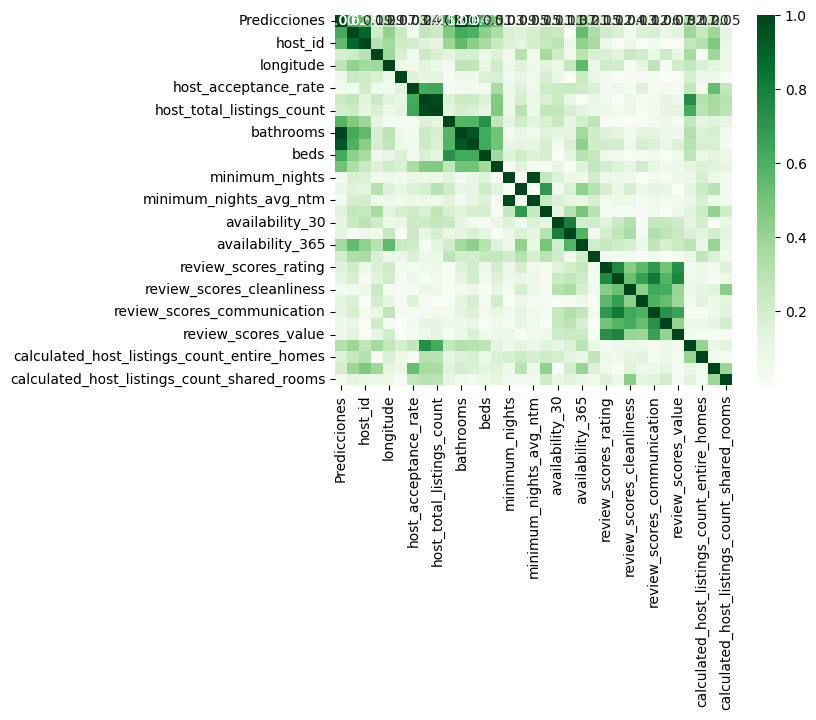

In [17]:
# Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Greens', annot = True, fmt = ".2f")

Heat_Map